---
# **Dataset Description: E-commerce Customer Behavior**
---

 - # **Overview :**

  This dataset provides a comprehensive view of customer behavior within an e-commerce platform. Each entry in the dataset corresponds to a unique customer, offering a detailed breakdown of their interactions and transactions. The information is crafted to facilitate a nuanced analysis of customer preferences, engagement patterns, and satisfaction levels, aiding businesses in making data-driven decisions to enhance the customer experience.
---

- # **Columns Descriptions :**

1.   **Customer ID:**

  *   A unique identifier assigned to each customer, ensuring distinction across the dataset.

2.   **Gender:**

  *   Specifies the gender of the customer, allowing for gender-based analytics.

3. **Age:**

  *   Represents the age of the customer, enabling age-group-specific insights.

4. **City:**

  *   Indicates the city of residence for each customer, providing geographic insights.

5. **Membership Type:**

  *    Identifies the type of membership held by the customer, influencing perks and benefits.
  
6. **Total Spend:**

  *   Records the total monetary expenditure by the customer on the e-commerce platform.

7. **Items Purchased:**

  *   Quantifies the total number of items purchased by the customer.

8. **Average Rating:**

  *   Represents the average rating given by the customer for purchased items, gauging satisfaction.

9. **Discount Applied:**

  *   Indicates whether a discount was applied to the customer's purchase, influencing buying behavior.

10. **Days Since Last Purchase:**

  *   Reflects the number of days elapsed since the customer's most recent purchase, aiding in retention analysis.

11. **Satisfaction Level:**

  *   Captures the overall satisfaction level of the customer, providing a subjective measure of their experience.

---

- # **Use Cases:**

1. **Customer Segmentation:**

  * Analyze and categorize customers based on demographics, spending habits, and satisfaction levels.

2. **Satisfaction Analysis:**

  * Investigate factors influencing customer satisfaction and identify areas for improvement.

3. **Promotion Strategy:**

  * Assess the impact of discounts on customer spending and tailor promotional strategies accordingly.

4. **Retention Strategies:**

  * Develop targeted retention strategies by understanding the time gap since the last purchase.

5. **City-based Insights:**

  * Explore regional variations in customer behavior to optimize marketing efforts based on location-specific trends.

---

# **Step - 1 : Import Libraries**

In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import kagglehub
# Download dataset
path = kagglehub.dataset_download("uom190346a/e-commerce-customer-behavior-dataset")

print("Path to dataset files:", path)

import os
for root, dirs, files in os.walk(path):
  for file in files:
    print(os.path.join(root, file))

Path to dataset files: /root/.cache/kagglehub/datasets/uom190346a/e-commerce-customer-behavior-dataset/versions/1
/root/.cache/kagglehub/datasets/uom190346a/e-commerce-customer-behavior-dataset/versions/1/E-commerce Customer Behavior - Sheet1.csv


# **Step - 2 : Read & Explore the Data**

In [2]:
# Assuming there's a CSV file in the path
file_path = os.path.join(path, "E-commerce Customer Behavior - Sheet1.csv")
df = pd.read_csv(file_path, encoding = 'latin-1')

# Display the first few row of the dataset
df.head(5)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [3]:
df.tail(5)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [4]:
# Shape of Data
df.shape

(350, 11)

In [5]:
# Information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [6]:
# The summary of data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,350.0,275.500000,101.180532,101.0,188.25,275.5,362.75,450.0
Age,350.0,33.597143,4.870882,26.0,30.00,32.5,37.00,43.0
Total Spend,350.0,845.381714,362.058695,410.8,502.00,775.2,1160.60,1520.1
Items Purchased,350.0,12.600000,4.155984,7.0,9.00,12.0,15.00,21.0
Average Rating,350.0,4.019143,0.580539,3.0,3.50,4.1,4.50,4.9
Days Since Last Purchase,350.0,26.588571,13.440813,9.0,15.00,23.0,38.00,63.0


# **Step - 3 : Data Preprocessing**

In [7]:
# Checking the null values

df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [8]:
# Drop the null values

df = df.dropna()

df.isna().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [9]:
# Checking for duplicated values
df.duplicated().sum()

0

# **Step - 4 : Data Analysis & Visulization**

In [10]:
df['Gender'].value_counts().reset_index()

,Gender,count
0,Male,175
1,Female,173


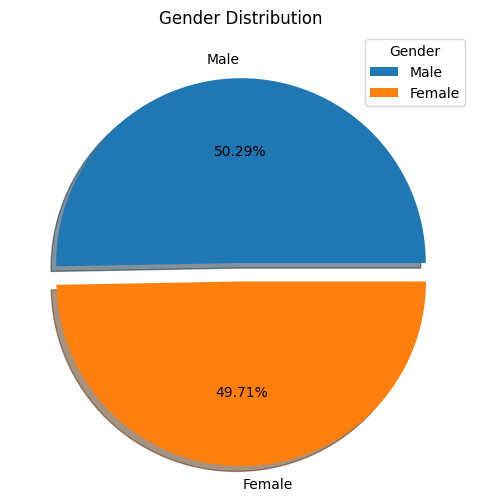

In [11]:
# Visualize the gender column

plt.figure(figsize = (8,6))
labels = ['Male','Female']
explode = [0,0.1]
plt.pie(df['Gender'].value_counts(), labels = labels, autopct = '%1.2f%%', explode = explode, shadow = True)
plt.legend(title = "Gender")
plt.title("Gender Distribution")
plt.show()

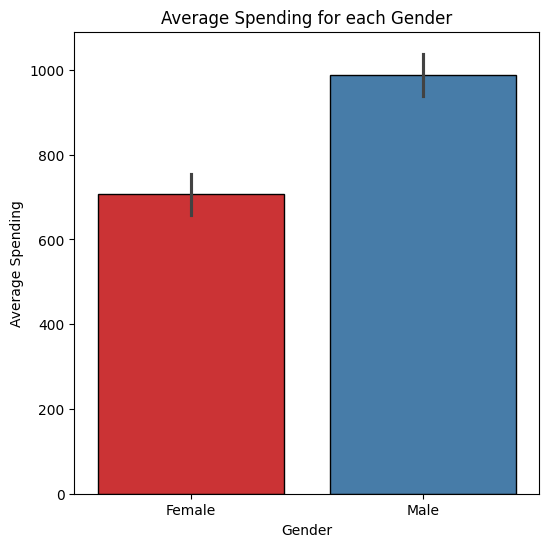

In [12]:
# Find the relation between the average spending and gender

plt.figure(figsize = (6,6))
sns.barplot(data = df, x = 'Gender', y = 'Total Spend', hue = 'Gender', palette = "Set1", edgecolor = 'black')
plt.xlabel('Gender')
plt.ylabel('Average Spending')
plt.title('Average Spending for each Gender')
plt.show()

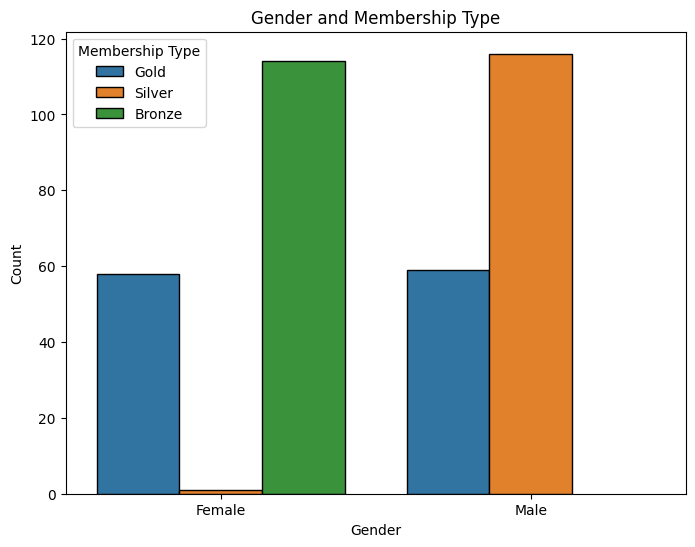

In [13]:
# Visualize the gender and membership type

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'Gender', hue = 'Membership Type', edgecolor = 'black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender and Membership Type')
plt.show()

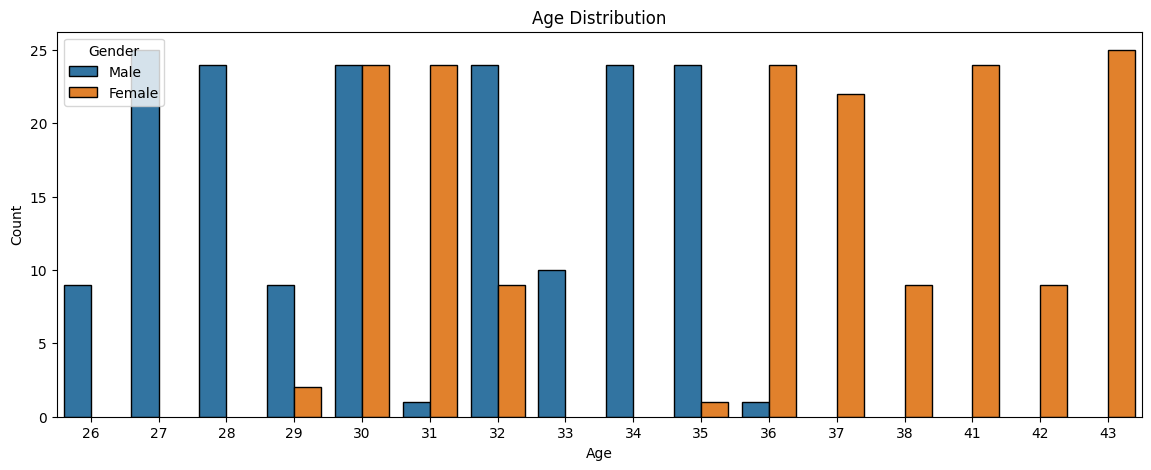

In [14]:
# Visualize the agee distriution

plt.figure(figsize = (14,5))
sns.countplot(data = df, x = 'Age', hue = 'Gender', edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title = 'Gender', loc = 'upper left')
plt.show()

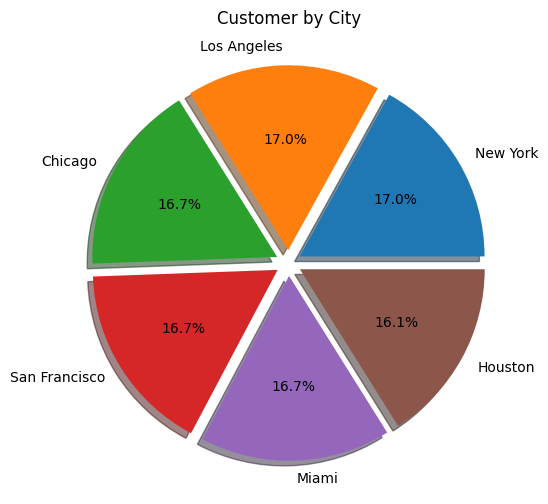

In [15]:
# Visualize customer by city

plt.figure(figsize = (8,6))
num_cities = len(df['City'].value_counts())
explode = [0.07] * num_cities

plt.pie(df['City'].value_counts(), labels = df['City'].value_counts().index, autopct = '%1.1f%%', shadow = True, explode = explode)
plt.title('Customer by City')
plt.show()

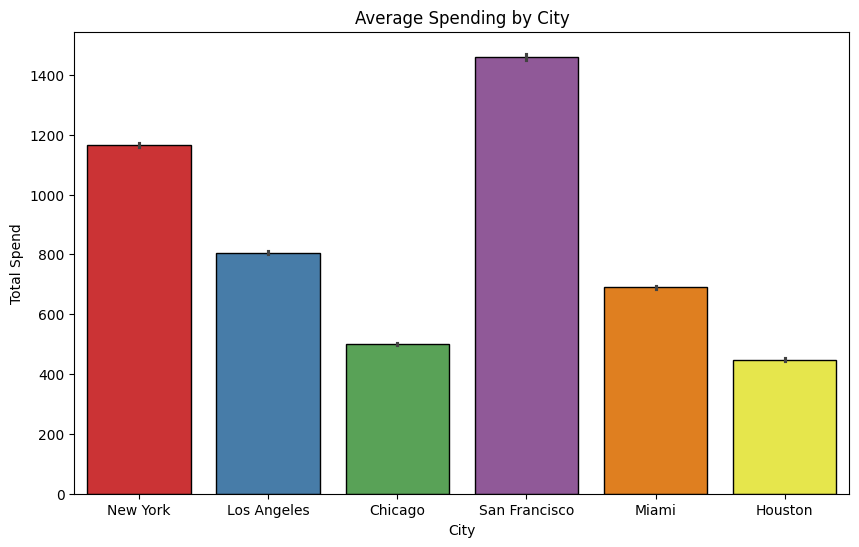

In [16]:
# Visualize the average spending by city

plt.figure(figsize = (10,6))

sns.barplot(data = df, x = 'City', y = 'Total Spend', hue = 'City', palette = 'Set1', edgecolor = 'black')
plt.xlabel('City')
plt.ylabel('Total Spend')
plt.title('Average Spending by City')
plt.show()

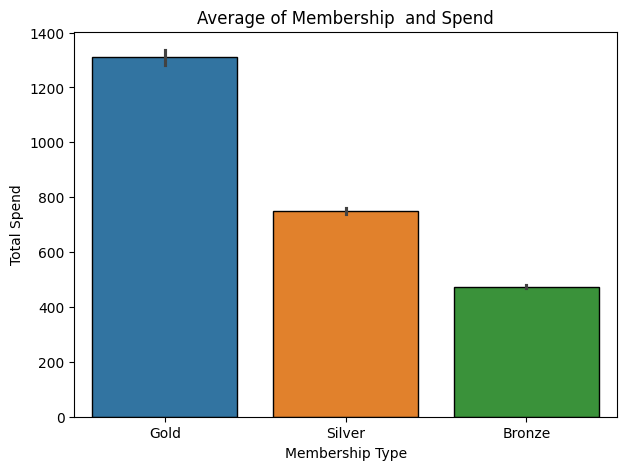

In [17]:
# average of Membership and Spend

plt.figure(figsize = (7,5))
sns.barplot(df, x = 'Membership Type', y = 'Total Spend', hue = 'Membership Type', edgecolor = 'black')
plt.title("Average of Membership  and Spend")
plt.show()

In [18]:
# Making a new column of "Age Group"
Age_Group = ['21-30', '31-50']
df['Age_Group'] = pd.cut(df.Age, bins = np.arange(15,46,15), labels = Age_Group, right = True)
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Age_Group
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,21-30
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,31-50
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,31-50
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,21-30
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,21-30


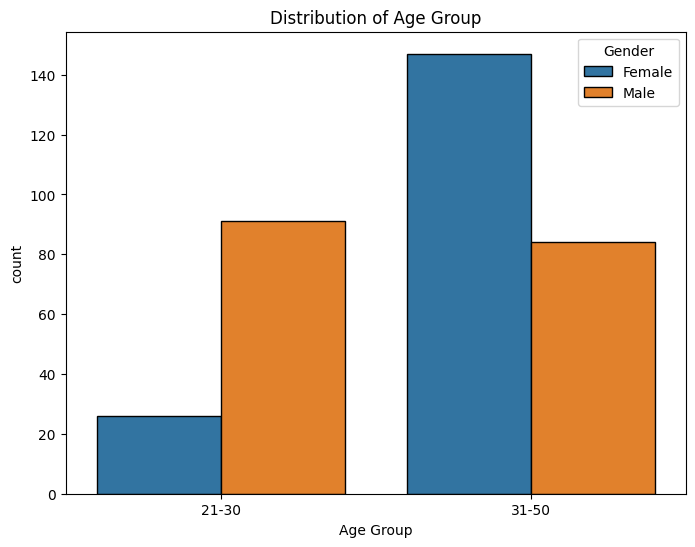

In [19]:
# Visualize the distribution of Age_Group

plt.figure(figsize = (8,6))
sns.countplot(df, x = 'Age_Group', hue = 'Gender', edgecolor = 'black')
plt.title("Distribution of Age Group")
plt.xlabel('Age Group')
plt.show()

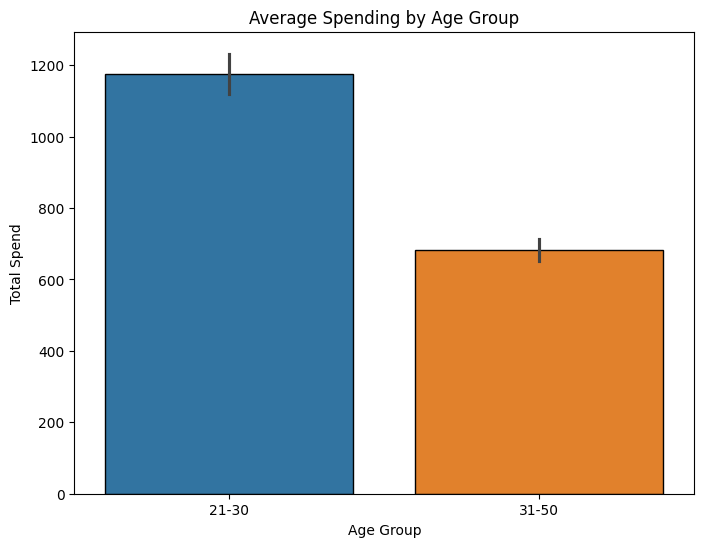

In [20]:
# Average spending by age group

plt.figure(figsize = (8,6))
sns.barplot(df, x = 'Age_Group', y = 'Total Spend', hue = 'Age_Group', edgecolor = 'black')
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.show()

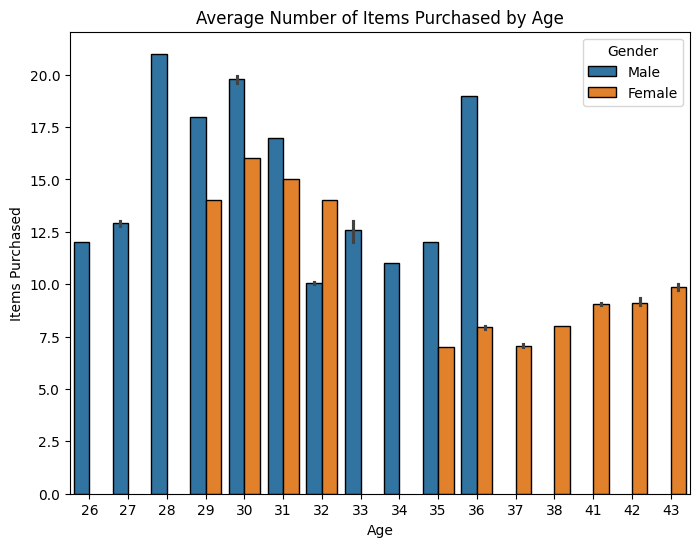

In [21]:
# Average number of items purchased by age

plt.figure(figsize = (8,6))

sns.barplot(df, x = 'Age', y = 'Items Purchased', hue = 'Gender', edgecolor = 'black')
plt.title('Average Number of Items Purchased by Age')
plt.xlabel('Age')
plt.show()

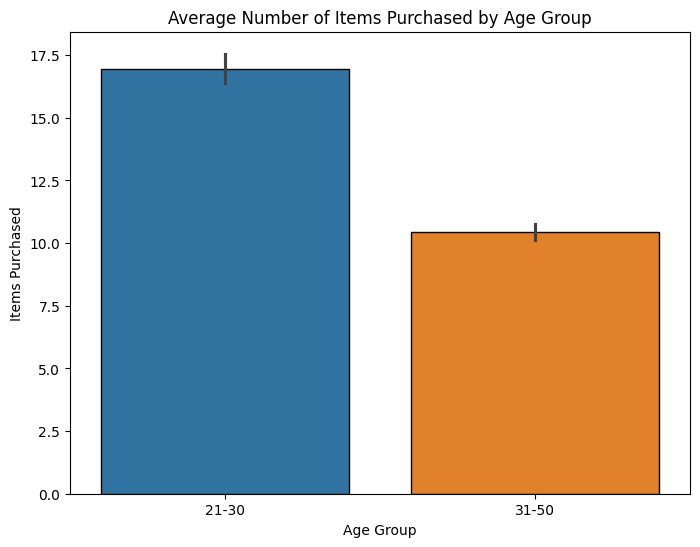

In [22]:
# Average number of items purchased by age group

plt.figure(figsize = (8,6))

sns.barplot(df, x = 'Age_Group', y = 'Items Purchased', hue = 'Age_Group', edgecolor = 'black')
plt.title('Average Number of Items Purchased by Age Group')
plt.xlabel('Age Group')
plt.show()

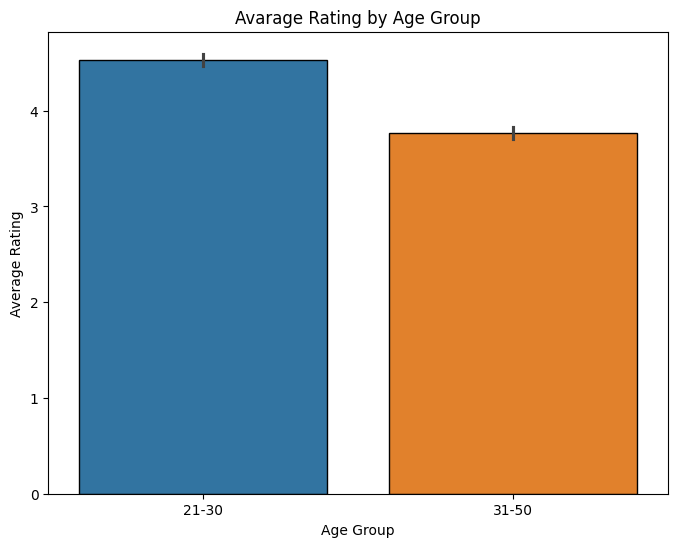

In [23]:
# Average Rating by age group

plt.figure(figsize = (8,6))
sns.barplot(df, x = 'Age_Group', y = 'Average Rating', hue = 'Age_Group', edgecolor = 'black')
plt.title('Avarage Rating by Age Group')
plt.xlabel('Age Group')
plt.show()

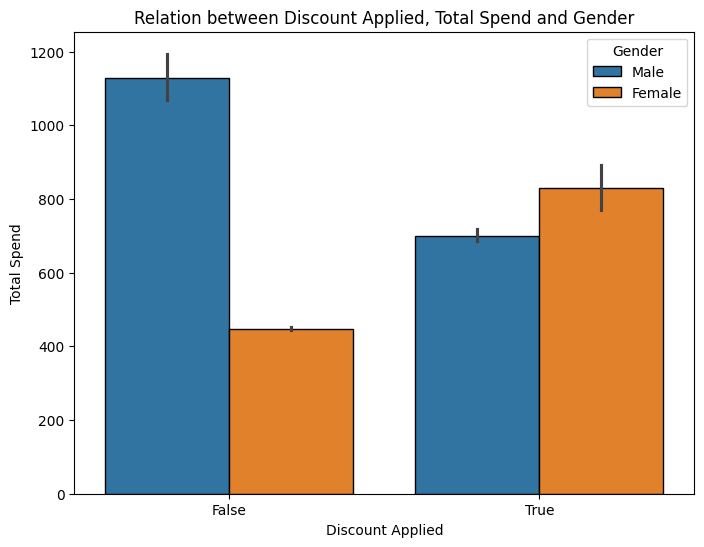

In [24]:
# Visualize the relation between discount applied, total spend and gender

plt.figure(figsize = (8,6))
sns.barplot(df, x = 'Discount Applied', y = 'Total Spend', hue = 'Gender', edgecolor = 'black')
plt.title('Relation between Discount Applied, Total Spend and Gender')
plt.xlabel('Discount Applied')
plt.show()

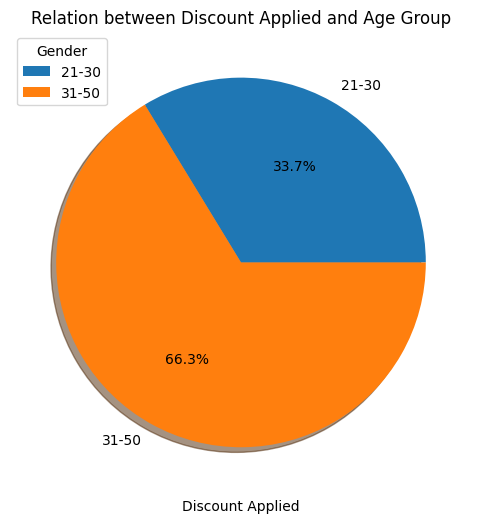

In [25]:
# Visualize the relation between discpunt applied and age group

plt.figure(figsize = (8,6))
plt.pie(df.groupby('Age_Group')['Discount Applied'].sum(), labels = df['Age_Group'].unique(), autopct = '%1.1f%%', shadow = True)
plt.title('Relation between Discount Applied and Age Group')
plt.xlabel('Discount Applied')
plt.legend(title = 'Gender', loc = 'upper left')
plt.show()

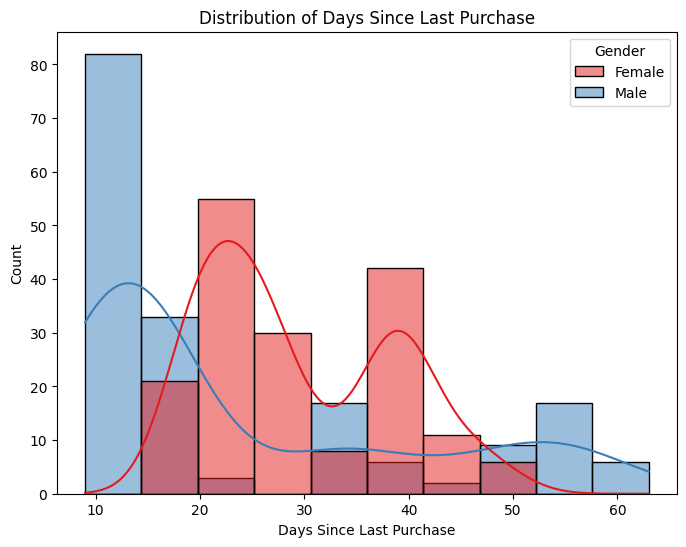

In [26]:
# Visualize the distribution of Days Since Last Purchase

plt.figure(figsize = (8,6))
sns.histplot(df, x = 'Days Since Last Purchase', hue = 'Gender', palette= 'Set1', kde = True)
plt.title('Distribution of Days Since Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.show()

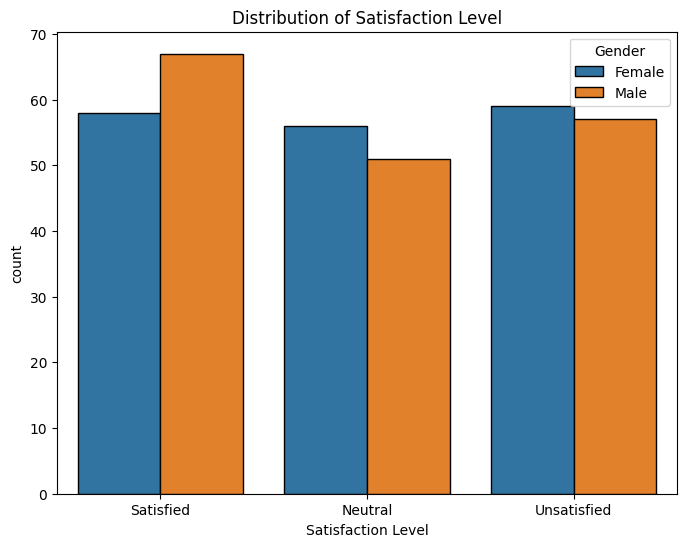

In [27]:
# Visualize the distribution of Satisfaction level

plt.figure(figsize =(8,6))
sns.countplot(df, x = 'Satisfaction Level', hue = 'Gender', edgecolor = 'black')
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.show()

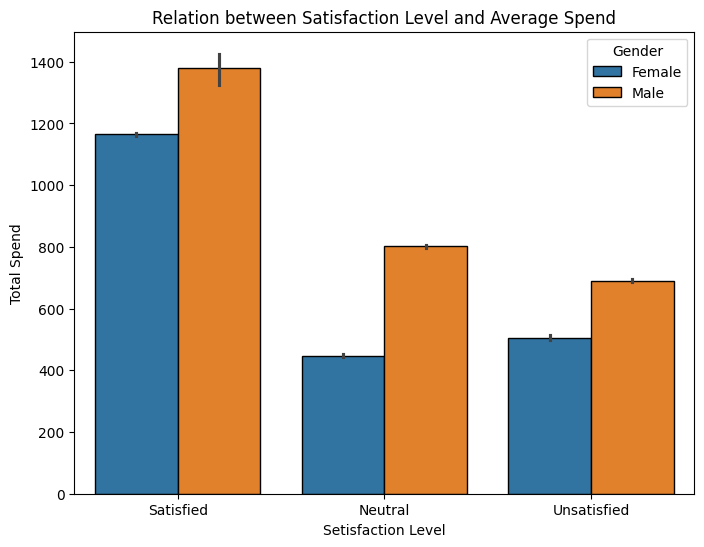

In [28]:
# Find the relation between Satisfaction Level and Average Spend

plt.figure(figsize = (8,6))
sns.barplot(df, x = 'Satisfaction Level', y = 'Total Spend', hue = 'Gender', edgecolor = 'black')
plt.title('Relation between Satisfaction Level and Average Spend')
plt.xlabel('Setisfaction Level')
plt.show()

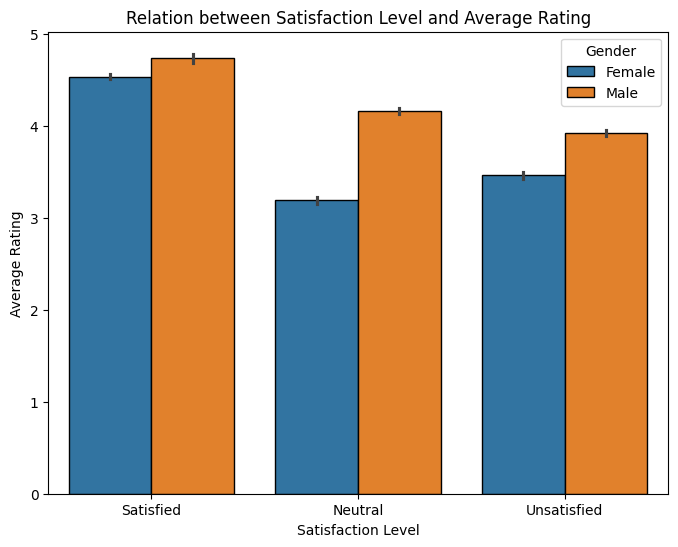

In [29]:
# Find the relation between Satisfaction Level and Average Rating

plt.figure(figsize = (8,6))
sns.barplot(df, x = 'Satisfaction Level', y = 'Average Rating', hue = 'Gender', edgecolor = 'black')
plt.title('Relation between Satisfaction Level and Average Rating')
plt.xlabel('Satisfaction Level')
plt.show()

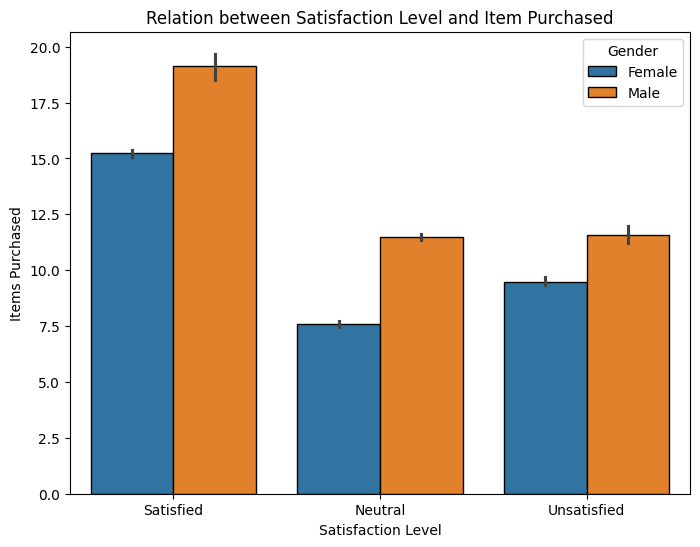

In [30]:
# Relation between satisfaction level and item purchased

plt.figure(figsize = (8,6))
sns.barplot(df, x = 'Satisfaction Level', y = 'Items Purchased', hue = 'Gender', edgecolor = 'black')
plt.title('Relation between Satisfaction Level and Item Purchased')
plt.xlabel('Satisfaction Level')
plt.show()

<Figure size 800x600 with 0 Axes>

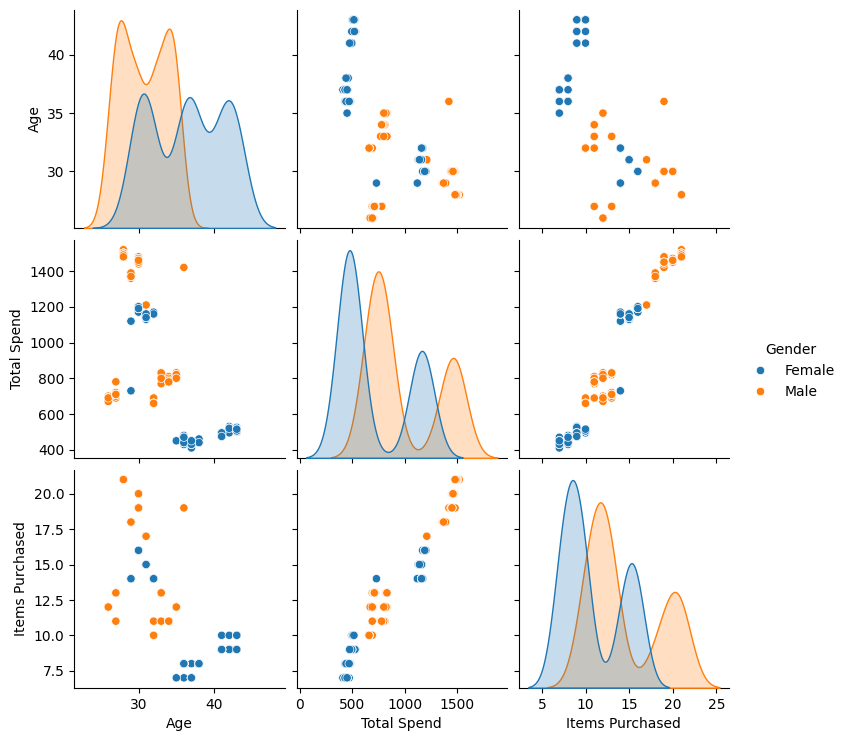

In [31]:
# Pairplot of "Age" vs "Total Spend" vs "Items Purchased"
plt.figure(figsize = (8,6))
sns.pairplot(df, vars = ['Age', 'Total Spend', 'Items Purchased'], hue ='Gender')
plt.show()

# **Step - 5 : Split Data**

In [32]:
X = df.drop(columns = ['Satisfaction Level'])
y = df['Satisfaction Level']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("The shape of X_train", X_train.shape)
print("The shape of X_test", X_test.shape)
print("The shape of y_train", y_train.shape)
print("The shape of y_test", y_test.shape)

The shape of X_train (278, 11)
The shape of X_test (70, 11)
The shape of y_train (278,)
The shape of y_test (70,)


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer()
X_train_vec = vectorize.fit_transform(X_train)
X_test_vec = vectorize.transform(X_test)
# y_train_vec = vectorize.fit_transform(y_train)
# y_test_vec = vectorize.transform(y_test)


print(X_train_vec)
print(X_test_vec)
# print(y_train_vec)
# print(y_test_vec)

  (0, 5)	0.7071067811865476
  (0, 9)	0.7071067811865476
  (1, 8)	1.0
  (2, 0)	1.0
  (3, 4)	1.0
  (4, 12)	0.7071067811865476
  (4, 19)	0.7071067811865476
  (5, 18)	0.7071067811865476
  (5, 17)	0.7071067811865476
  (6, 10)	0.7071067811865476
  (6, 14)	0.7071067811865476
  (7, 3)	0.7071067811865476
  (7, 15)	0.7071067811865476
  (8, 7)	0.7071067811865476
  (8, 2)	0.7071067811865476
  (9, 6)	0.5
  (9, 16)	0.5
  (9, 11)	0.5
  (9, 13)	0.5
  (10, 1)	1.0
  (0, 5)	0.7071067811865476
  (0, 9)	0.7071067811865476
  (1, 8)	1.0
  (2, 0)	1.0
  (3, 4)	1.0
  (4, 12)	0.7071067811865476
  (4, 19)	0.7071067811865476
  (5, 17)	0.7071067811865476
  (5, 18)	0.7071067811865476
  (6, 10)	0.7071067811865476
  (6, 14)	0.7071067811865476
  (7, 3)	0.7071067811865476
  (7, 15)	0.7071067811865476
  (8, 2)	0.7071067811865476
  (8, 7)	0.7071067811865476
  (9, 6)	0.5
  (9, 11)	0.5
  (9, 13)	0.5
  (9, 16)	0.5
  (10, 1)	1.0


In [34]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 278 entries, 179 to 103
Series name: Satisfaction Level
Non-Null Count  Dtype 
--------------  ----- 
278 non-null    object
dtypes: object(1)
memory usage: 4.3+ KB


# **Step - 6 : Train the Model**

## 1. Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'Gender', 'City', 'Membership Type', 'Discount Applied', and 'Age Group' need encoding
# Add any other non-numerical columns to this list
# **Make sure 'Age Group' is actually a column in your X_train DataFrame**
# **If it was dropped, you will need to modify the initial data preparation steps**
categorical_features = ['Gender', 'City', 'Membership Type', 'Discount Applied', 'Age_Group']

# Create a ColumnTransformer to apply different preprocessing to different columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')

# Apply the preprocessing to X_train and X_test
# Before applying fit_transform, print the columns of X_train to verify 'Age Group' is present
print(X_train.columns)  # Add this line to check columns
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Age_Group'],
      dtype='object')


LogisticRegression()

In [36]:
y_pred = model.predict(X_test_encoded)
y_pred

array([1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 0, 0, 2,
       2, 0, 0, 2])

# **Step - 7 : Accuracy, Error**

In [41]:
from sklearn.metrics import classification_report, accuracy_score

# Accuracy
y_test = y_test.astype(int)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("")
print("\nClassification:", report)


Accuracy: 1.0


Classification:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        19

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



# **Step - 8 : Decision Tree Classifier**

In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

In [43]:
y_pred = model.predict(X_test_encoded)
y_pred

array([1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2,
       2, 0, 0, 2])

In [44]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[24,  1,  0],
       [ 0, 26,  0],
       [ 0,  0, 19]])

In [45]:
# Classification Matrix

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        19

    accuracy                           0.99        70
   macro avg       0.99      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70

